# Analyse des tarifs réglementés de l'électricité en France

Source des données: 
- https://www.data.gouv.fr/fr/datasets/historique-des-tarifs-reglementes-de-vente-delectricite-pour-les-consommateurs-residentiels/

Cette analyse de base sur la part variable TTC. Comprendre le tarif auquel les fournisseurs achètent l'électricité à Enedis. 

De plus, nous avons sélectionné les valeurs de part variable TTC pour des puissances souscrites == 6 en raison du fait qu'elle est celle la plus souscrite en France.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'TRV électricité inf36 BASE_2012- S2 2023.csv'

# Chargement des données
electricity_data = pd.read_csv(file_path, sep=";")

# Affichage des premières lignes pour comprendre la structure du fichier
electricity_data.head(10)

,DATE_DEBUT,DATE_FIN,P_SOUSCRITE,PART_FIXE_HT,PART_FIXE_TTC,PART_VARIABLE_HT,PART_VARIABLE_TTC
0,23/07/2012,31/07/2013,3,"55,56","69,37","0,0822","0,1256"
1,23/07/2012,31/07/2013,6,"65,64","82,98","0,0828","0,1263"
2,23/07/2012,31/07/2013,9,"76,08","96,97","0,0848","0,1287"
3,23/07/2012,31/07/2013,12,"118,08","153,7","0,0848","0,1287"
4,23/07/2012,31/07/2013,15,"135,72","177,66","0,0848","0,1287"
5,01/08/2013,31/10/2014,3,"38,88","51,7","0,0883","0,1329"
6,01/08/2013,31/10/2014,6,"66,72","84,05","0,0883","0,1329"
7,01/08/2013,31/10/2014,9,"89,76","111,33","0,0883","0,1329"
8,01/08/2013,31/10/2014,12,135,"171,49","0,0883","0,1329"
9,01/08/2013,31/10/2014,15,"153,84","196,7","0,0883","0,1329"


In [3]:
# Selection des puissances souscrites == 6
electricity_data = electricity_data[electricity_data["P_SOUSCRITE"]==6]

# Conversion des colonnes de dates en format de date
electricity_data['DATE_DEBUT'] = pd.to_datetime(electricity_data['DATE_DEBUT'], format='%d/%m/%Y')
electricity_data['DATE_FIN'] = pd.to_datetime(electricity_data['DATE_FIN'], format='%d/%m/%Y')

# Conversion de la colonne "PART_VARIABLE_TTC" en numérique (remplacement des virgules par des points)
electricity_data['PART_VARIABLE_TTC'] = electricity_data['PART_VARIABLE_TTC'].str.replace(',', '.').astype(float)

electricity_data.head(10)

,DATE_DEBUT,DATE_FIN,P_SOUSCRITE,PART_FIXE_HT,PART_FIXE_TTC,PART_VARIABLE_HT,PART_VARIABLE_TTC
1,2012-07-23,2013-07-31,6,"65,64","82,98","0,0828",0.1263
6,2013-08-01,2014-10-31,6,"66,72","84,05","0,0883",0.1329
11,2014-11-01,2015-07-31,6,"68,64","86,49","0,0909",0.1401
16,2015-08-01,2016-07-31,6,"68,64","86,49","0,0909",0.1437
21,2016-08-01,2017-07-31,6,"70,44","88,39","0,0932",0.1503
26,2017-08-01,2018-01-31,6,"81,24","99,92","0,0901",0.1466
31,2018-02-01,2018-07-31,6,"85,92","107,08","0,0902",0.1467
36,2018-08-01,2019-05-31,6,"88,44","110,55","0,0888",0.1450
41,2019-06-01,2019-07-31,6,"88,44","110,55","0,0954",0.1531
46,2019-08-01,2020-01-31,6,"95,76","119,72","0,0948",0.1524


# Evolution du prix de l'électricité par années

Cette partie permet de comprendre et de visualiser comment le prix de l'électricité varie en fonction des années.

In [4]:
# Extraction de l'année de la colonne "DATE_DEBUT"
electricity_data['ANNEE'] = electricity_data['DATE_DEBUT'].dt.year

# Calcul du prix moyen de l'électricité par année
average_price_per_year = electricity_data.groupby('ANNEE')['PART_VARIABLE_TTC'].mean()

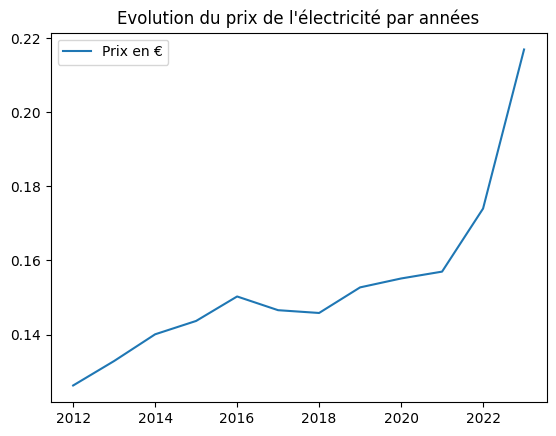

In [5]:
plt.plot(average_price_per_year.index, average_price_per_year.values, label="Prix en €")
plt.title("Evolution du prix de l'électricité par années")
plt.legend()

# Evolution de la différence de prix de l'électricité par années

Cette partie permet de comprendre comment le tarif de l'électricité diffère en fonction des années

In [6]:
# Calcul de l'augmentation du prix par rapport à l'année précédente
price_increase_per_year = average_price_per_year.diff()
price_increase_per_year

ANNEE
2012        NaN
2013    0.00660
2014    0.00720
2015    0.00360
2016    0.00660
2017   -0.00370
2018   -0.00075
2019    0.00690
2020    0.00240
2021    0.00185
2022    0.01700
2023    0.04290
Name: PART_VARIABLE_TTC, dtype: float64

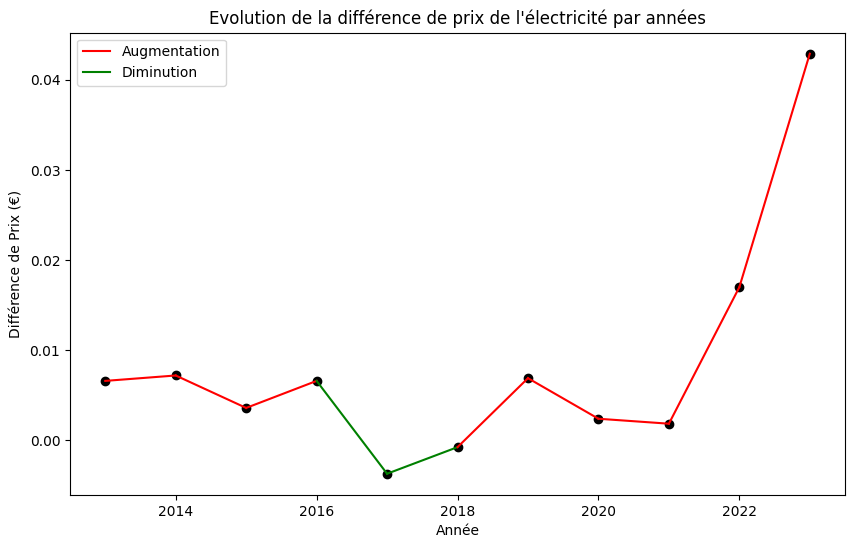

In [16]:
# Création du graphique avec des lignes de couleurs différentes pour chaque segment
plt.figure(figsize=(10, 6))

aug_displayed, dim_displayed = False, False

# Récupération des années et des valeurs
years = price_increase_per_year.index
values = price_increase_per_year.values
mean_values = np.mean(values[~np.isnan(values)])

# Tracé des lignes entre chaque point consécutif avec la couleur appropriée
for i in range(1, len(years)):
    if values[i] > 0:
        if not aug_displayed:
            aug_displayed = plt.plot([years[i-1], years[i]], [values[i-1], values[i]], 'r-', label="Augmentation")  # Rouge pour les augmentations
        else:
            plt.plot([years[i-1], years[i]], [values[i-1], values[i]], 'r-')
    else:
        if not dim_displayed:
            dim_displayed = plt.plot([years[i-1], years[i]], [values[i-1], values[i]], 'g-', label="Diminution")  # Vert pour les diminutions
        else:
            plt.plot([years[i-1], years[i]], [values[i-1], values[i]], 'g-')

# Ajout de points pour chaque année
plt.scatter(years, values, color='black')

# Titre et étiquettes
plt.title("Evolution de la différence de prix de l'électricité par années")
plt.xlabel("Année")
plt.ylabel("Différence de Prix (€)")
plt.legend()

# Affichage du graphique
plt.show()

# Conclusion

In [19]:
print(f"Le prix de l'électricité a évolué en moyenne sur les {len(price_increase_per_year)} dernières années de {mean_values.2}")

SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (719296475.py, line 1)